#Quantum Fourier Transform.

Let's start by reminding ourselves the classical Discrete Fourier Transform. DFT is given as;

$$X[n] = \sum_{k=0}^{N-1} x[k] \cdot e^{\frac{-i2\pi nk}{N}}$$

Where the N is the size of the input sequence.

$$n\in \{  0,1,...N-1  \}$$
and similarly,
$$k\in \{  0,1,...N-1  \}$$ 

Let's have a look at a simple example for the given sequence;

$$x[k] = [8,2,4,2] $$

[5. 1. 1. 1.]


[Text(0, 0.5, 'x[n]'), Text(0.5, 0, 'n')]

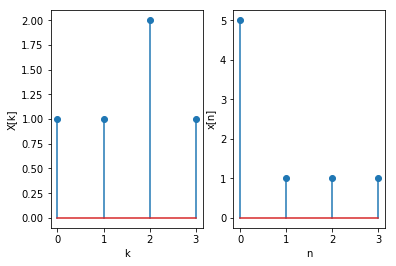

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram
N = 4
k = np.linspace(0,N-1,N)
n = k
x = np.array([1,1,2,1])
f = np.zeros(N,dtype=complex)
for i in range(N):
    f[i] = sum(x*np.exp(-1j*2*np.pi*i*k/N))
f = np.abs(f)
print(f)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.stem(k,x)
ax1.set(xlabel='k',ylabel='X[k]')
ax2.stem(n,f)
ax2.set(xlabel='n',ylabel='x[n]')


In [2]:
norm = np.sqrt(sum(x*x))
x = x / norm
print('X: ' + str(x))
print('X^2: ' + str(x**2))
print(sum(x**2))

theta1 = 2 * np.arccos(np.sqrt(x[0]**2 + x[2]**2))
theta2 = 2 * np.arccos(np.sqrt(x[0]**2 + x[1]**2))

print(theta1,theta2)
amps = [np.cos(theta2/2)*np.cos(theta1/2),np.cos(theta2/2)*np.sin(theta1/2),np.sin(theta2/2)*np.cos(theta1/2),np.sin(theta2/2)*np.sin(theta1/2)]
print('00: %.2f' %amps[0]**2)
print('01: %.2f' %amps[1]**2)
print('10: %.2f' %amps[2]**2)
print('11: %.2f' %amps[3]**2)

X: [0.37796447 0.37796447 0.75592895 0.37796447]
X^2: [0.14285714 0.14285714 0.57142857 0.14285714]
0.9999999999999998
1.1278852827212582 2.0137073708685356
00: 0.20
01: 0.08
10: 0.51
11: 0.20


Measured: 01, with Probability = 0.10 
Measured: 11, with Probability = 0.20 
Measured: 00, with Probability = 0.16 
Measured: 10, with Probability = 0.54 


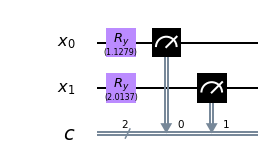

In [3]:
backend = Aer.get_backend('qasm_simulator')
q = QuantumRegister(2,'x')
c = ClassicalRegister(2,'c')
circuit = QuantumCircuit(q, c)

circuit.ry(theta1,q[0])
circuit.ry(theta2,q[1])

circuit.measure(q, c)
shots = 100
job = execute(circuit,backend,shots=shots)
counts = job.result().get_counts(circuit)
for keys in counts:
    print('Measured: %s, with Probability = %.2f ' %(keys,counts[keys]/shots))
circuit.draw(output='mpl')

In [4]:
def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(np.pi/float(2**(k-j)), q[k], q[j])
        circ.barrier()

In [5]:
backend = Aer.get_backend('qasm_simulator')
q = QuantumRegister(2,'x')
c = ClassicalRegister(2,'c')
circuit = QuantumCircuit(q, c)

circuit.ry(theta1,q[0])
circuit.ry(theta2,q[1])

circuit.h(q[0])
circuit.cu1(np.pi/2,q[1],q[0]) #(controlled 1 0 0 e^jtheta)
circuit.h(q[1])

circuit.measure(q, c)
shots = 1000
job = execute(circuit,backend,shots=shots)
counts = job.result().get_counts(circuit)
for keys in counts:
    print('Measured: %s, with Probability = %.3f ' %(keys,counts[keys]/shots))

Measured: 01, with Probability = 0.027 
Measured: 11, with Probability = 0.027 
Measured: 00, with Probability = 0.886 
Measured: 10, with Probability = 0.060 


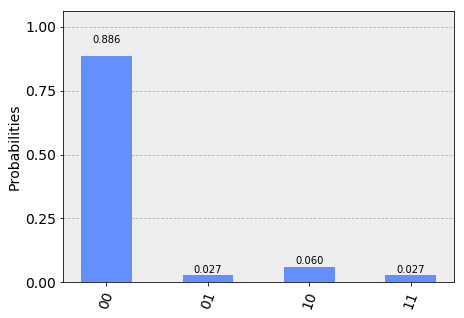

In [6]:
plot_histogram(counts)

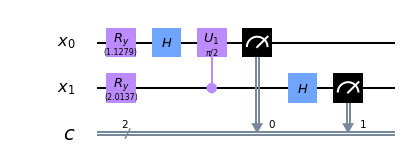

In [7]:
circuit.draw(output='mpl')